# Project Setup

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pickle
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
# Load the dataset containing athlete information and the NOC regions
athletes = pd.read_csv("athlete_events.csv")
noc = pd.read_csv("noc_regions.csv")

# Data Exploration & Preprocessing

In [3]:
# Explore the dataset
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
noc=noc[['NOC','region']]
noc.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [5]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
# Display statistical summary
athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


## Handle Missing Values

In [7]:
# Check for missing values
athletes.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
# Drop rows with missing values in the athletes dataset
athletes = athletes.dropna()

In [9]:
# Drop rows with missing values in the NOC dataset
noc = noc.dropna()

In [10]:
# Impute missing values in Age, Height, Weight columns with their respective means
imputer = SimpleImputer(strategy='mean')
athletes['Age'] = imputer.fit_transform(athletes[['Age']])
athletes['Height'] = imputer.fit_transform(athletes[['Height']])
athletes['Weight'] = imputer.fit_transform(athletes[['Weight']])

In [11]:
# Fill missing values in the Medal column with 'None'
athletes['Medal'].fillna('None', inplace=True)

## Merging datasets

In [12]:
# Merge the athletes dataset with the NOC regions dataset
athletes = athletes.merge(noc, on='NOC', how='left')

In [13]:
# Replace the 'NOC' column with 'region'
athletes['NOC'] = athletes['region']
athletes = athletes.drop(columns=['region'])

In [14]:
# Combine 'Team' and 'NOC' columns into 'Combined_Team'
athletes['Combined_Team'] = athletes['NOC'].fillna(athletes['Team'])
athletes = athletes.drop(columns=['Team', 'NOC'])

In [15]:
# Standardize the text data in columns: 'Combined_Team', 'City', 'Sport', 'Event'
athletes['Combined_Team'] = athletes['Combined_Team'].str.strip()
athletes['City'] = athletes['City'].str.strip()
athletes['Sport'] = athletes['Sport'].str.strip()
athletes['Event'] = athletes['Event'].str.strip()
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Games,Year,Season,City,Sport,Event,Medal,Combined_Team
0,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
1,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland
2,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
3,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland


## Dropping duplicates

In [16]:
# Remove duplicate rows
athletes.drop_duplicates(inplace=True)

In [17]:
# Remove remaining duplicates based on specific columns
athletes = athletes.drop_duplicates(subset=['Name', 'Sex', 'Combined_Team', 'Event'], keep='first')

## Visualize & Identify Outliers

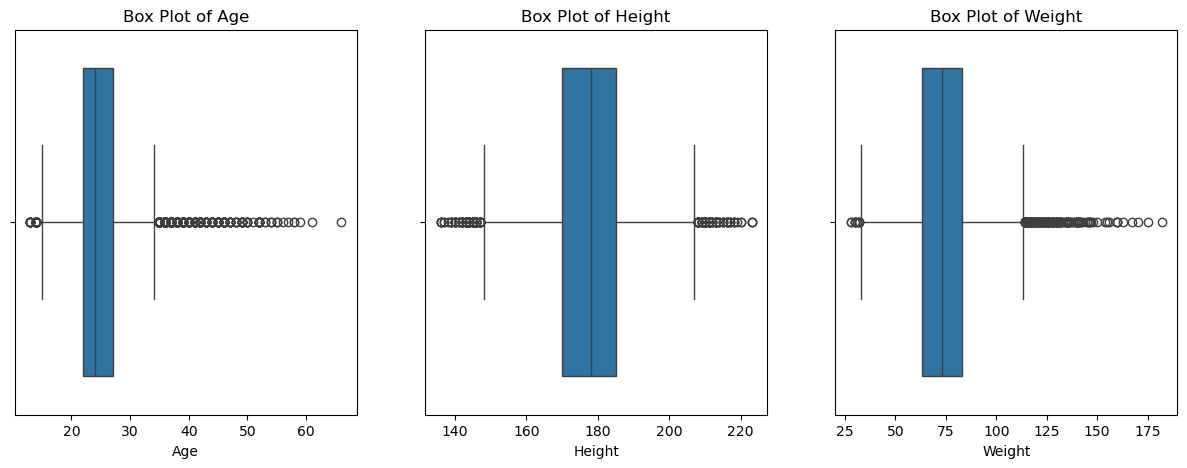

In [18]:
# Plotting box plots for Age, Height, Weight
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=athletes['Age'])
plt.title('Box Plot of Age')

plt.subplot(1, 3, 2)
sns.boxplot(x=athletes['Height'])
plt.title('Box Plot of Height')

plt.subplot(1, 3, 3)
sns.boxplot(x=athletes['Weight'])
plt.title('Box Plot of Weight')

plt.show()

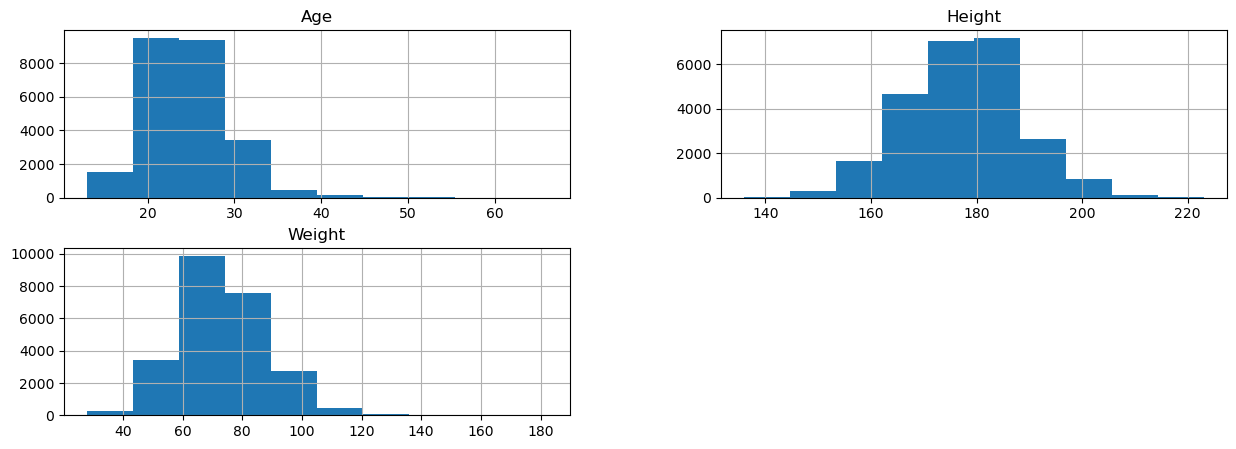

In [19]:
# Plot histograms for Age, Height, Weight
athletes[['Age', 'Height', 'Weight']].hist(figsize=(15, 5))
plt.show()

In [20]:
# Use Z-scores to identify outliers
athletes['Age_Zscore'] = zscore(athletes['Age'])
athletes['Height_Zscore'] = zscore(athletes['Height'])
athletes['Weight_Zscore'] = zscore(athletes['Weight'])

# Remove outliers based on Z-score
athletes = athletes[(athletes['Age_Zscore'].abs() <= 3) & 
                    (athletes['Height_Zscore'].abs() <= 3) & 
                    (athletes['Weight_Zscore'].abs() <= 3)]

# Drop the Z-score columns
athletes = athletes.drop(columns=['Age_Zscore', 'Height_Zscore', 'Weight_Zscore'])

In [21]:
# Re-check for unrealistic values
print(athletes[(athletes['Age'] < 10) | (athletes['Age'] > 100)])
print(athletes[(athletes['Height'] < 100) | (athletes['Height'] > 250)])
print(athletes[(athletes['Weight'] < 30) | (athletes['Weight'] > 200)])

Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Games, Year, Season, City, Sport, Event, Medal, Combined_Team]
Index: []
Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Games, Year, Season, City, Sport, Event, Medal, Combined_Team]
Index: []
Empty DataFrame
Columns: [ID, Name, Sex, Age, Height, Weight, Games, Year, Season, City, Sport, Event, Medal, Combined_Team]
Index: []


In [22]:
# Check unique values for each categorical column
print("\n\nUnique values in 'Sex':\n", athletes['Sex'].unique())
print("\n\nUnique values in 'Combined_Team':\n", athletes['Combined_Team'].unique())
print("\n\nUnique values in 'Medal':\n", athletes['Medal'].unique())
print("\n\nUnique values in 'Season':\n", athletes['Season'].unique())
print("\n\nUnique values in 'City':\n", athletes['City'].unique())
print("\n\nUnique values in 'Sport':\n", athletes['Sport'].unique())



Unique values in 'Sex':
 ['M' 'F']


Unique values in 'Combined_Team':
 ['Finland' 'Norway' 'Netherlands' 'Italy' 'Spain' 'Azerbaijan' 'Russia'
 'Belarus' 'France' 'Cameroon' 'USA' 'Hungary' 'Australia' 'Iran' 'Canada'
 'Pakistan' 'Uzbekistan' 'Tajikistan' 'Japan' 'Ethiopia' 'Germany'
 'Sweden' 'Turkey' 'Bulgaria' 'Egypt' 'UK' 'Jordan' 'Romania'
 'Switzerland' 'Puerto Rico' 'Mexico' 'Ghana' 'Morocco' 'New Zealand'
 'Argentina' 'Cuba' 'Poland' 'Czech Republic' 'Nigeria' 'Brazil'
 'Lithuania' 'South Africa' 'Indonesia' 'Chile' 'Ukraine' 'Greece'
 'Uganda' 'Syria' 'Kuwait' 'Saudi Arabia' 'Croatia' 'Armenia' 'Serbia'
 'Niger' 'India' 'Algeria' 'Austria' 'Trinidad' 'Colombia' 'Botswana'
 'Tunisia' 'South Korea' 'North Korea' 'China' 'Denmark' 'Uruguay'
 'Guyana' 'Kazakhstan' 'Georgia' 'Kenya' 'Iceland' 'Jamaica' 'Malaysia'
 'Slovakia' 'Bahamas' 'Paraguay' 'Montenegro' 'Ireland' 'Portugal'
 'Guatemala' 'Qatar' 'Luxembourg' 'Belgium' 'Tanzania' 'Lebanon'
 'Kyrgyzstan' 'Individual Olympic At

In [23]:
# Display the frequency distribution for each categorical column
print(athletes['Sex'].value_counts())
print(athletes['Combined_Team'].value_counts())
print(athletes['Medal'].value_counts())
print(athletes['Season'].value_counts())
print(athletes['Year'].value_counts())
print(athletes['Sport'].value_counts())

Sex
M    15793
F     8099
Name: count, dtype: int64
Combined_Team
USA                     3501
Russia                  2760
Germany                 2511
Australia                940
Canada                   870
                        ... 
Botswana                   1
Niger                      1
Kuwait                     1
Jordan                     1
United Arab Emirates       1
Name: count, Length: 132, dtype: int64
Medal
Bronze    8337
Silver    7890
Gold      7665
Name: count, dtype: int64
Season
Summer    20165
Winter     3727
Name: count, dtype: int64
Year
1984    1522
1988    1509
2004    1507
2000    1505
2016    1498
1992    1496
2008    1486
2012    1407
1996    1359
1980    1292
1976    1230
1972    1126
1968     994
1964     955
1960     772
1956     507
2014     423
2010     383
2006     382
2002     356
1998     334
1952     254
1994     225
1948     181
1920     169
1936     162
1924     162
1932     156
1928     143
1908     118
1912     115
1906      56
1904      52


## Feature Engineering

In [24]:
# One-Hot Encoding for 'Sex' column
athletes = pd.get_dummies(athletes, columns=['Sex'])
athletes[['Sex_F', 'Sex_M']] = athletes[['Sex_F', 'Sex_M']].astype(int)

In [25]:
# Grouping data by Year and Combined_Team
grouped_df = athletes.groupby(['Year', 'Combined_Team']).agg({
    'Age': 'mean',
    'Height': 'mean',
    'Weight': 'mean',
    'Event': pd.Series.nunique,
    'Medal': 'count',
    'Sex_F': 'sum',
    'Sex_M': 'sum'
}).reset_index()

In [26]:
# Create a column for previous medal count
grouped_df = grouped_df.sort_values(by=['Combined_Team', 'Year'])
grouped_df['Prev_Medal'] = grouped_df.groupby('Combined_Team')['Medal'].shift(1).fillna(0)
grouped_df.rename(columns={'Combined_Team': 'Team'}, inplace=True)

In [27]:
grouped_df.tail(10)

,Year,Team,Age,Height,Weight,Event,Medal,Sex_F,Sex_M,Prev_Medal
1030,2008,Venezuela,24.000000,155.000000,49.000000,1,1,1,0,2.0
1139,2012,Venezuela,26.000000,175.000000,75.000000,1,1,0,1,1.0
1243,2016,Venezuela,21.333333,175.000000,63.000000,3,3,2,1,1.0
830,2000,Vietnam,26.000000,157.000000,47.000000,1,1,1,0,0.0
1031,2008,Vietnam,23.000000,152.000000,56.000000,1,1,0,1,1.0
569,1988,"Virgin Islands, US",27.000000,180.000000,90.000000,1,1,0,1,0.0
728,1996,Zambia,27.000000,183.000000,81.000000,1,1,0,1,0.0
477,1980,Zimbabwe,27.000000,162.642857,58.214286,1,14,14,0,0.0
925,2004,Zimbabwe,20.000000,176.000000,64.000000,3,3,3,0,14.0
1032,2008,Zimbabwe,24.000000,176.000000,64.000000,1,1,1,0,3.0


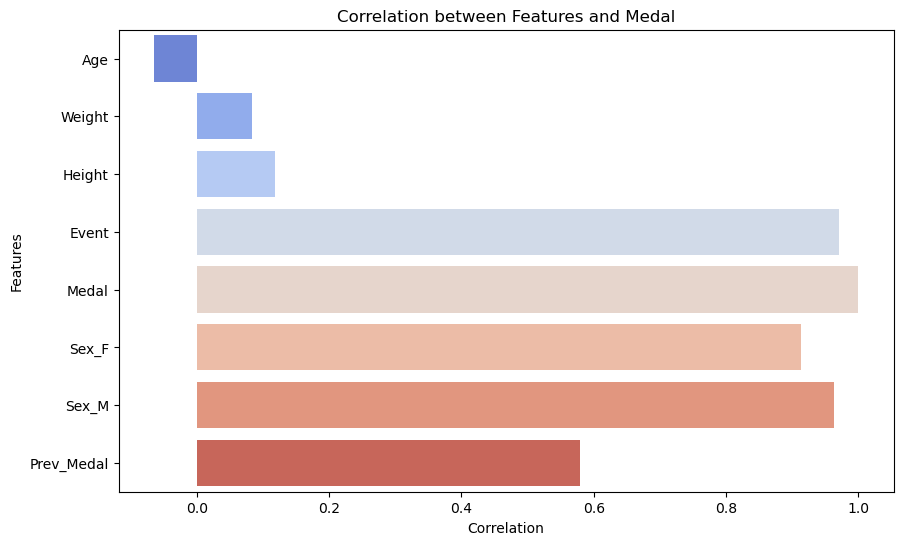

In [28]:
# Calculate the correlation matrix
correlation_matrix = grouped_df[['Age', 'Weight', 'Height', 'Event', 'Medal', 
                                 'Sex_F', 'Sex_M', 'Prev_Medal']].corrwith(grouped_df['Medal'])

# Convert to DataFrame for easy plotting
correlation_df = correlation_matrix.to_frame().reset_index()
correlation_df.columns = ['Feature', 'Correlation with Medal']

# Plot the correlations using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x='Correlation with Medal', y='Feature', palette='coolwarm', orient='h')
plt.title('Correlation between Features and Medal')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

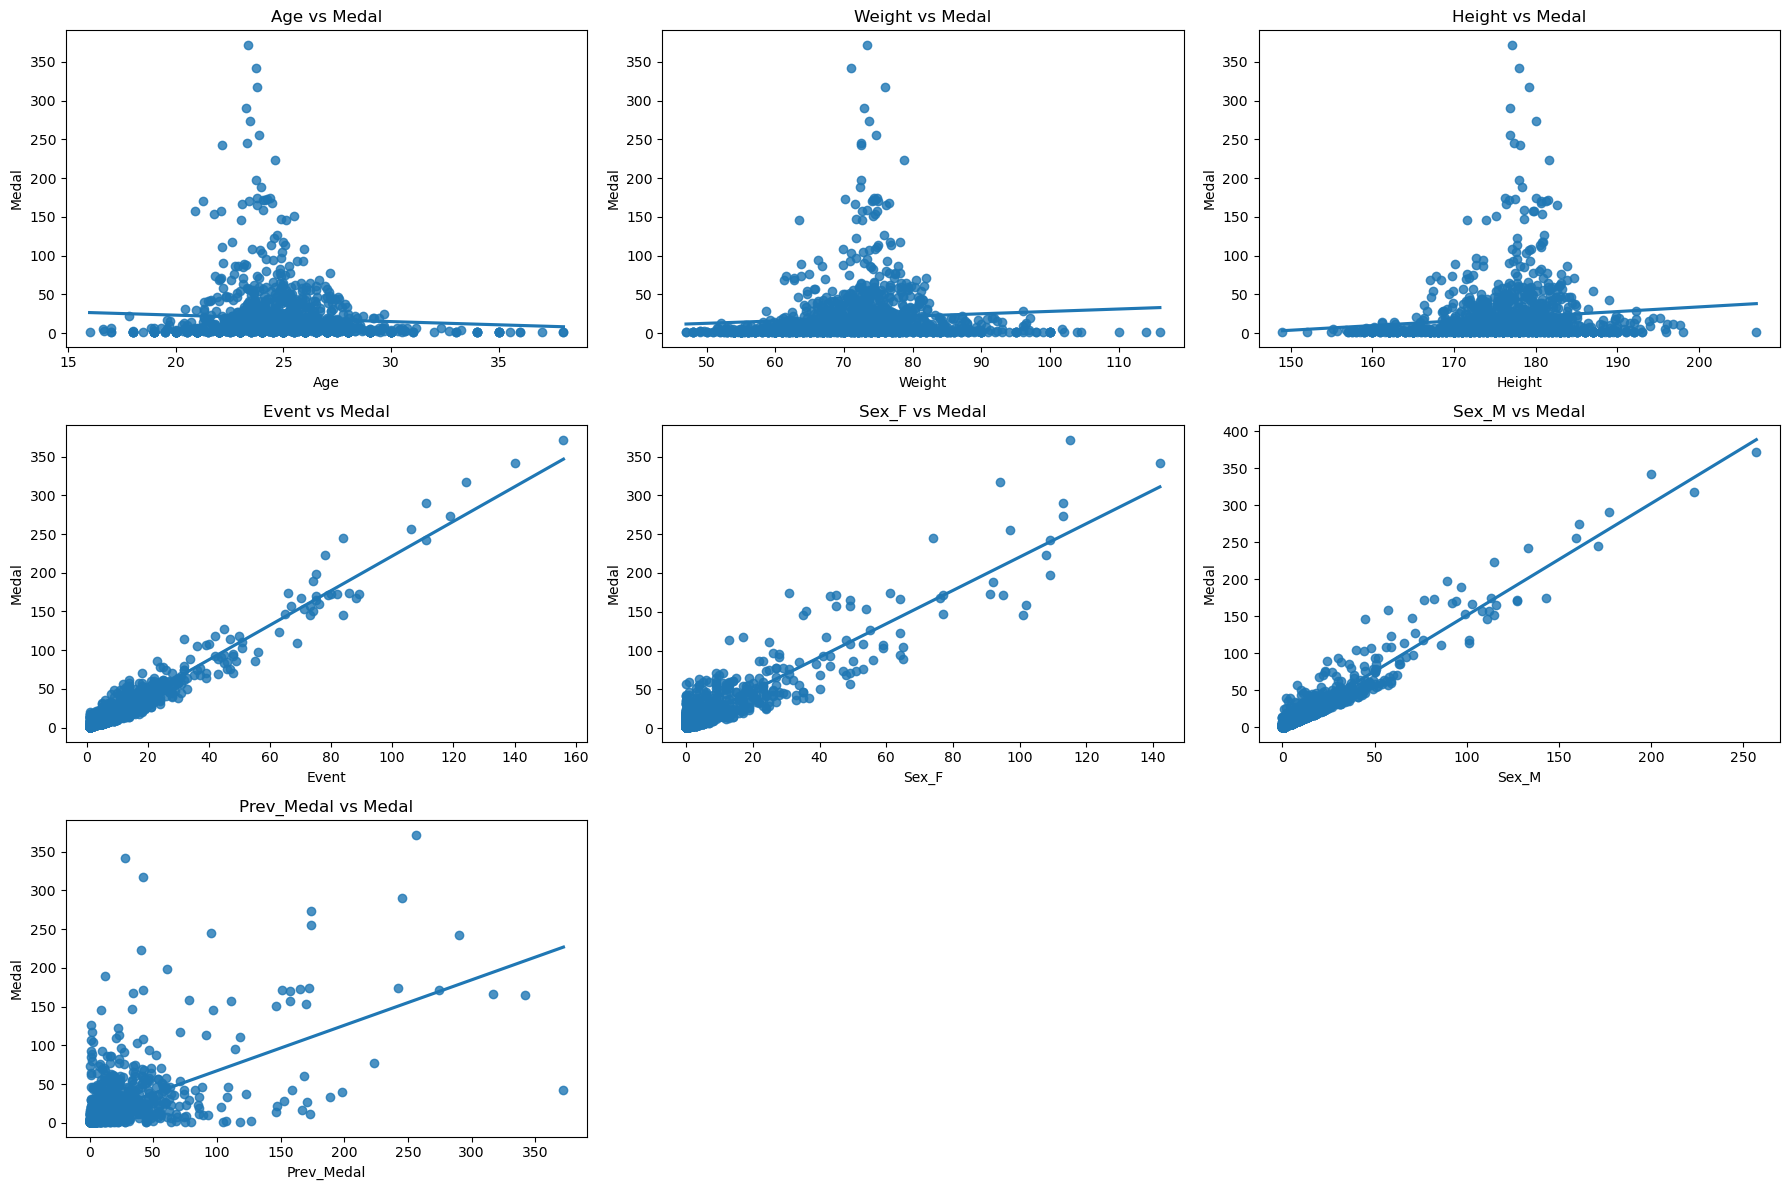

In [29]:
# List of features to plot
features = ['Age', 'Weight', 'Height', 'Event', 'Sex_F', 'Sex_M', 'Prev_Medal']

# Create a grid of plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the 2D array of axes to iterate easily

# Generate plots
for i, feature in enumerate(features):
    sns.regplot(x=feature, y='Medal', data=grouped_df, ax=axes[i], ci=None)
    axes[i].set_title(f'{feature} vs Medal')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Medal')

# Remove unused subplot (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [30]:
# Drop columns with low correlation with the target variable
grouped_df = grouped_df[['Year', 'Team', 'Event', 'Sex_F', 'Sex_M', 'Prev_Medal', 'Medal']]
grouped_df.head()

,Year,Team,Event,Sex_F,Sex_M,Prev_Medal,Medal
950,2008,Afghanistan,1,0,1,0.0,1
1058,2012,Afghanistan,1,0,1,1.0,1
570,1992,Algeria,2,1,1,0.0,2
655,1996,Algeria,3,0,3,2.0,3
753,2000,Algeria,5,1,4,3.0,5


# Model Building

In [31]:
# Prepare features and target variable
X = grouped_df.drop(columns=['Year', 'Team', 'Medal'])
y = grouped_df['Medal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Prediction

In [32]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([  2.,  64.,   2.,  66.,  37.,   1.,  46.,   4.,   1.,   2.,   2.,
        10.,   5.,   1.,   1.,   4.,   1.,   1.,  18., 274.,   3.,  17.,
        28.,   1.,   1.,  88.,  20.,  30.,   4.,  48.,   3.,  42.,  18.,
         3.,  14.,   3.,  31., 157.,  78.,   1.,  10.,  55.,  12.,   8.,
         1.,  11.,   1.,   1.,  51.,   7.,   1.,  13.,  44.,   1.,   5.,
         4.,  11.,   4.,  61.,  44., 103.,   5.,  17.,   6.,   3., 174.,
         6.,  19.,   9.,   5.,  19.,  41.,   5.,   2.,  54.,  29.,   9.,
        18., 242.,   3.,  30.,   1.,  70.,   6.,  77.,   1.,   3.,  28.,
         7.,   1.,   1.,  20.,  22.,   9.,   7.,  14.,   2.,   4.,   2.,
        36.,   1.,   1.,   1.,   1.,  58.,   1.,   1.,   1.,   1.,   1.,
        11.,   1.,  10.,   3.,  19.,   2.,  15.,  13.,  80.,   5.,   4.,
         5.,  27.,   6.,   3.,   7.,  48.,  37.,   3.,   6.,  29.,   5.,
         1.,   1.,  16.,  12.,   1., 118.,   6.,  20., 107.,   2.,   8.,
         1.,   1.,  10.,  13.,  11.,   4.,   7.,   

In [33]:
# Adding predictions column to test set
test_set_with_predictions = pd.DataFrame(X_test, columns=X.columns)
test_set_with_predictions['Actual_Medal'] = y_test.values
test_set_with_predictions['Predicted_Medal'] = y_pred
test_set_with_predictions.reset_index(drop=True, inplace=True)
test_set_with_predictions.head(20)

,Event,Sex_F,Sex_M,Prev_Medal,Actual_Medal,Predicted_Medal
0,-0.477290,-0.414634,-0.471877,-0.099918,2,2.0
1,1.418804,0.609769,1.688199,0.887296,64,64.0
2,-0.477290,-0.414634,-0.471877,-0.477382,2,2.0
3,1.486522,1.429291,1.228608,0.480796,66,66.0
4,0.267604,0.678062,0.401345,0.625975,37,37.0
5,-0.545008,-0.414634,-0.517836,-0.477382,1,1.0
6,0.741628,1.497584,0.263468,0.335618,46,46.0
7,-0.341855,-0.141460,-0.563795,-0.448346,4,4.0
8,-0.545008,-0.414634,-0.517836,-0.448346,1,1.0
9,-0.545008,-0.414634,-0.471877,-0.506418,2,2.0


## Model Evaluation

In [34]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 0.00
R-squared: 1.00


In [35]:
# Model coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients

,Feature,Coefficient
0,Event,-1.300601e-14
1,Sex_F,1.464268e+01
2,Sex_M,2.175849e+01
3,Prev_Medal,7.105427e-15


# Model Deployment

## Save the Model

In [36]:
# Save the model and scaler to a pickle file
with open('olympic_medal_predictor.pkl', 'wb') as file:
    pickle.dump({'model': model, 'scaler': scaler}, file)

print("Model and scaler saved to 'olympic_medal_predictor.pkl'")

Model and scaler saved to 'olympic_medal_predictor.pkl'


## Load and Use the Model

In [38]:
# Load the model and scaler from the pickle file
with open('olympic_medal_predictor.pkl', 'rb') as file:
    data = pickle.load(file)
    loaded_model = data['model']
    loaded_scaler = data['scaler']

# Function to get user input and make prediction
def get_user_input():
    event = int(input("Enter Number of Events: "))
    sex_f = int(input("Enter Number of Female Athletes: "))
    sex_m = int(input("Enter Number of Male Athletes: "))
    prev_medal = float(input("Enter Number of Previous Medals: "))

    # Create a DataFrame with the user input
    input_data = pd.DataFrame({
        'Event': [event],
        'Sex_F': [sex_f],
        'Sex_M': [sex_m],
        'Prev_Medal': [prev_medal]
    })

    # Preprocess input data (e.g., scaling)
    input_data_scaled = loaded_scaler.transform(input_data)

    # Make prediction using the loaded model
    prediction = loaded_model.predict(input_data_scaled)

    return prediction[0]

# Get prediction from user input
predicted_medal = get_user_input()
print(f'\nPredicted Medals: {predicted_medal:.0f}')

Enter Number of Events:  140
Enter Number of Female Athletes:  142
Enter Number of Male Athletes:  200
Enter Number of Previous Medals:  28



Predicted Medals: 342


In [ ]:
''' 
Sample inputs:

Enter Number of Events:  140
Enter Number of Female Atheletes:  142
Enter Number of Male Atheletes:  200
Enter Number of Previous Medals:  28


Output:

Predicted Medals: 342
'''